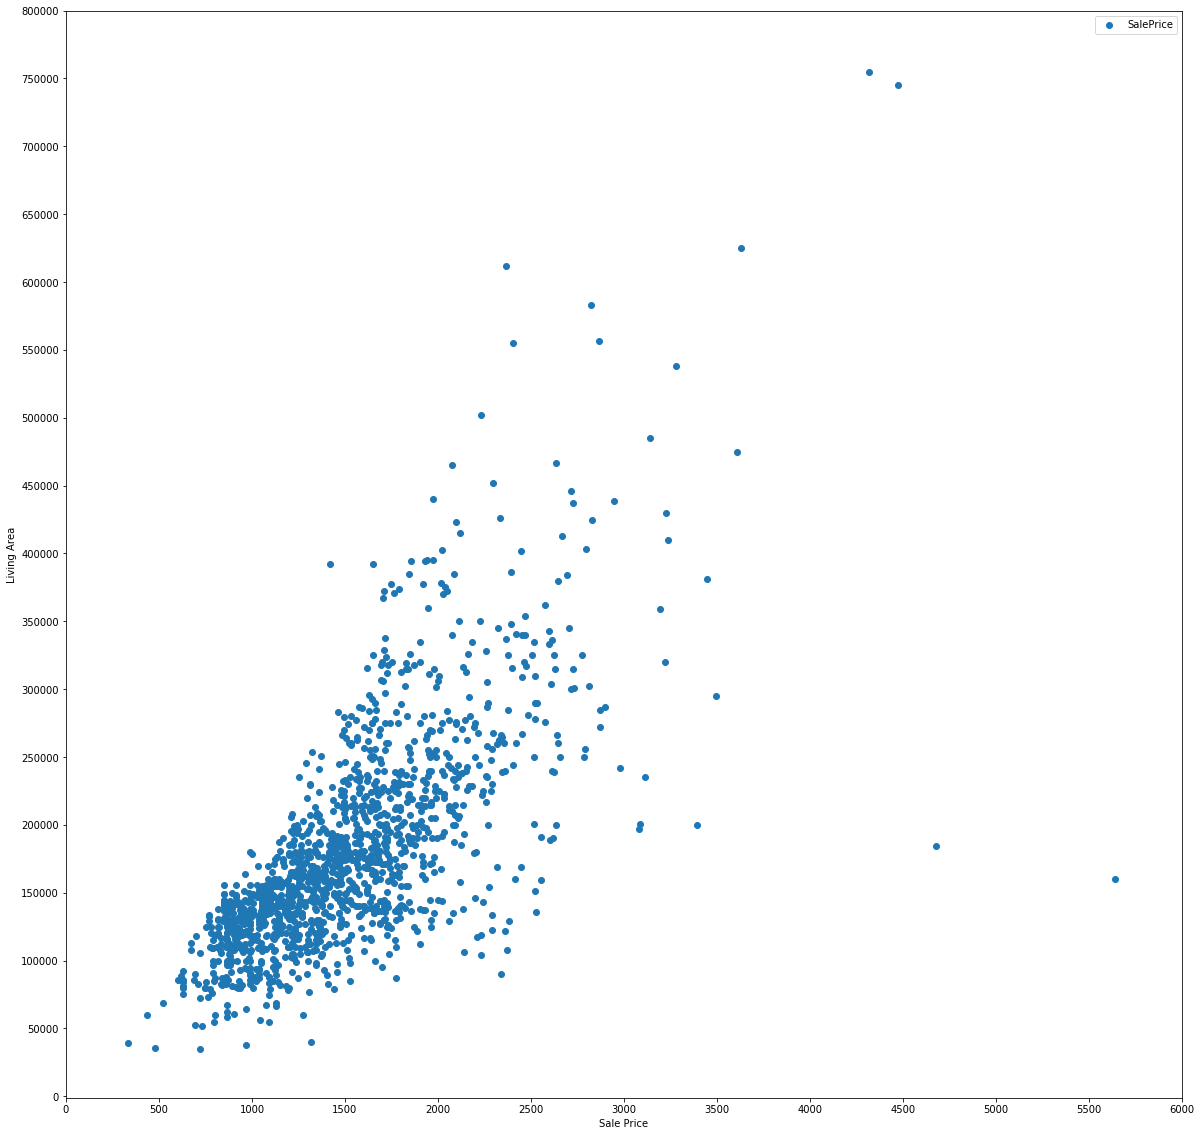

In [2]:
plt.scatter(train['GrLivArea'],train['SalePrice'])
#get reference to the current figure.
plt.gcf().set_size_inches((20, 20))
#pass the xaxis and yaxis values
plt.xticks(list(range(0,6001,500)))
plt.yticks(list(range(0,800001,50000)))
#set axis label values
plt.xlabel('Sale Price')
plt.ylabel('Living Area')
#display legend values
plt.legend()
plt.show()

In [3]:
print("test.shape",test.shape)
print("train.shape",train.shape)
full=pd.concat([test,train],ignore_index=True)
print("full.shape",full.shape)

test.shape (1459, 80)
train.shape (1460, 81)
full.shape (2919, 81)


In [4]:
full.drop('Id',axis = "columns",inplace = True)

In [5]:
missing_values=full.isnull().sum()
pd.set_option('display.max_colwidth',-1)
missing_values[missing_values > 0].sort_values(ascending = False)
type(missing_values)

pandas.core.series.Series

In [6]:
full['LotAreaCut'] = pd.qcut(full.LotArea,10)
full.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                    mean median count
Neighborhood                         
Blmngtn       46.900000   43.0   20  
Blueste       27.300000   24.0   10  
BrDale        21.500000   21.0   30  
BrkSide       55.789474   51.0   95  
ClearCr       88.150000   80.5   20  
CollgCr       71.336364   70.0   220 
Crawfor       69.951807   70.0   83  
Edwards       66.910112   65.0   178 
Gilbert       74.207207   64.0   111 
IDOTRR        62.241379   60.0   87  
MeadowV       25.606061   21.0   33  
Mitchel       75.144444   74.0   90  
NAmes         75.210667   73.0   375 
NPkVill       28.142857   24.0   21  
NWAmes        81.517647   80.0   85  
NoRidge       91.629630   89.0   54  
NridgHt       84.184049   92.0   163 
OldTown       61.777293   60.0   229 
SWISU         59.068182   60.0   44  
Sawyer        74.551020   72.0   98  
SawyerW       70.669811   67.0   106 
Somerst       64.549383   72.5   162 
StoneBr       62.173913   60.0   46  
Timber        81.157895   82.0   57  
Veenker       72.000000   80.0   16

In [7]:
full.groupby(['LotAreaCut','Neighborhood'])['LotFrontage'].transform(lambda x : x.fillna(x.median(),inplace=True))
full['LotFrontage']= full.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x : x.fillna(x.median(),inplace=True))

In [8]:
columns2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional",
            "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col2 in columns2:
    full[col2].fillna(full[col2].mode()[0],inplace = True)
    

In [9]:
full['Electrical'].mode()

0    SBrkr
dtype: object

In [10]:
full["oMSSubClass"] =  full["MSSubClass"].astype('category').cat.codes
full["oMSZoning"] =  full["MSZoning"].astype('category').cat.codes
full["oNeighborhood"] =  full["Neighborhood"].astype('category').cat.codes
full["oCondition1"] =  full["Condition1"].astype('category').cat.codes
full["oBldgType"] =  full["BldgType"].astype('category').cat.codes
full["oHouseStyle"] =  full["HouseStyle"].astype('category').cat.codes
full["oExterior1st"] =  full["Exterior1st"].astype('category').cat.codes
full["oMasVnrType"] =  full["MasVnrType"].astype('category').cat.codes
full["oExterQual"] =  full["ExterQual"].astype('category').cat.codes
full["oFoundation"] =  full["Foundation"].astype('category').cat.codes
full["oBsmtQual"] =  full["BsmtQual"].astype('category').cat.codes
full["oBsmtExposure"] =  full["BsmtExposure"].astype('category').cat.codes
full["oHeating"] =  full["Heating"].astype('category').cat.codes
full["oHeatingQC"] =  full["HeatingQC"].astype('category').cat.codes
full["oKitchenQual"] =  full["KitchenQual"].astype('category').cat.codes
full["oFunctional"] =  full["Functional"].astype('category').cat.codes
full["oFireplaceQu"] =  full["FireplaceQu"].astype('category').cat.codes
full["oGarageType"] =  full["GarageType"].astype('category').cat.codes
full["oGarageFinish"] =  full["GarageFinish"].astype('category').cat.codes
full["oPavedDrive"] =  full["PavedDrive"].astype('category').cat.codes
full["oSaleType"] =  full["SaleType"].astype('category').cat.codes
full["oSaleCondition"] =  full["SaleCondition"].astype('category').cat.codes

In [11]:
full.shape

(2919, 103)

In [12]:
full[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,1961,1961,1961.0
1,1958,1958,1958.0
2,1997,1998,1997.0
3,1998,1998,1998.0
4,1992,1992,1992.0


In [13]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
dir(le)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_param_names',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'set_params',
 'transform']